# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://course.cse.ust.hk/comp4901j/Password_Only/programs/assignment1/index.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [34]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [35]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [36]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [37]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [7e-8, 1e-7, 2e-7]
regularization_strengths = [1e5, 3e5, 5e5, 1e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for rs in regularization_strengths:
        svmHyper = LinearSVM()
        svmHyper.train(X_train_feats, y_train, learning_rate=lr, reg=rs, num_iters=1500, verbose=False)
        
        y_train_pred = svmHyper.predict(X_train_feats)
        trainac = np.mean(y_train == y_train_pred)
        y_val_pred = svmHyper.predict(X_val_feats)
        validac = np.mean(y_val == y_val_pred)
        results[(lr, rs)] = (trainac, validac)
        
        if validac > best_val:
            best_val = validac
            best_svm = svmHyper
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 7.000000e-08 reg 1.000000e+05 train accuracy: 0.413653 val accuracy: 0.415000
lr 7.000000e-08 reg 3.000000e+05 train accuracy: 0.406102 val accuracy: 0.408000
lr 7.000000e-08 reg 5.000000e+05 train accuracy: 0.418143 val accuracy: 0.427000
lr 7.000000e-08 reg 1.000000e+06 train accuracy: 0.409837 val accuracy: 0.387000
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.413816 val accuracy: 0.411000
lr 1.000000e-07 reg 3.000000e+05 train accuracy: 0.399918 val accuracy: 0.389000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.415184 val accuracy: 0.403000
lr 1.000000e-07 reg 1.000000e+06 train accuracy: 0.404776 val accuracy: 0.405000
lr 2.000000e-07 reg 1.000000e+05 train accuracy: 0.411796 val accuracy: 0.407000
lr 2.000000e-07 reg 3.000000e+05 train accuracy: 0.413122 val accuracy: 0.422000
lr 2.000000e-07 reg 5.000000e+05 train accuracy: 0.400939 val accuracy: 0.406000
lr 2.000000e-07 reg 1.000000e+06 train accuracy: 0.395388 val accuracy: 0.388000
best validation accuracy ach

In [38]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.433


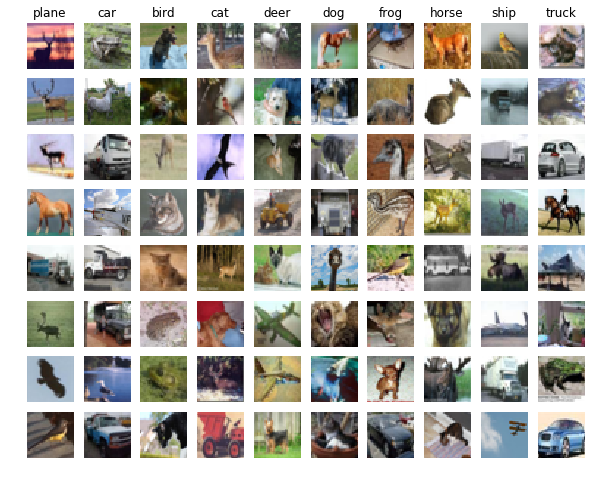

In [39]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

*In contrast to our pervious method, HOG and color histogram capture texture and color separately to classify images. In this way, the result may be largely affected by the noise of background's texture/color.
For example, many of the images that are misclassified under the label "plane", have clean backgrounds just like blue skys.*

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [49]:
print(X_train_feats.shape)

(49000, 155)


In [50]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time
tic = time.time()

input_dim = X_train_feats.shape[1]
hidden_dim = [199, 277, 449]
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rate = [3e-1, 1, 1.7]
regulation_strength = [2e-6, 1e-5, 4e-5]
best_val = -1

for hs in hidden_dim:
    for lr in learning_rate:
        for rs in regulation_strength:
            net = TwoLayerNet(input_dim, hs, num_classes)
            # Train the network
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                        num_iters=1000, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=rs, verbose=False)
            
            # Predict on the training set
            tra_acc = (net.predict(X_train_feats) == y_train).mean()
            print('hs %d lr %e rs %f' % (hs, lr, rs))
            print('Training accuracy: ', tra_acc)
            
            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            #print('hs %d lr %e rs %f' % (hs, lr, rs))
            print('Validation accuracy: ', val_acc)
            
            if val_acc > best_val:
                best_val = val_acc
                best_net = net
                
toc = time.time()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

hs 199 lr 3.000000e-01 rs 0.000002
Training accuracy:  0.5886326530612245
Validation accuracy:  0.548
hs 199 lr 3.000000e-01 rs 0.000010
Training accuracy:  0.5844285714285714
Validation accuracy:  0.552
hs 199 lr 3.000000e-01 rs 0.000040
Training accuracy:  0.5837346938775511
Validation accuracy:  0.557
hs 199 lr 1.000000e+00 rs 0.000002
Training accuracy:  0.6501224489795918
Validation accuracy:  0.561
hs 199 lr 1.000000e+00 rs 0.000010
Training accuracy:  0.6482040816326531
Validation accuracy:  0.558
hs 199 lr 1.000000e+00 rs 0.000040
Training accuracy:  0.6504897959183673
Validation accuracy:  0.569
hs 199 lr 1.700000e+00 rs 0.000002
Training accuracy:  0.6337142857142857
Validation accuracy:  0.537
hs 199 lr 1.700000e+00 rs 0.000010
Training accuracy:  0.6450204081632653
Validation accuracy:  0.532
hs 199 lr 1.700000e+00 rs 0.000040
Training accuracy:  0.6527551020408163
Validation accuracy:  0.573
hs 277 lr 3.000000e-01 rs 0.000002
Training accuracy:  0.590469387755102
Validatio

In [51]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)
print("Time spent:", toc-tic)

0.549
Time spent: 88.45847654342651


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

## Early Stopping ##
--------
Looking into the log of the training process above, we see that many trained models has a high training accuracy (~70%), however achieving only about 55% of accuracy for both validation set and test set.
What is the reason that causes the gap?

<br />

I did some research on the Internet, and guessed that the gap is due to the models being overfit to their training datas. In addition, there seems to be a simple trick, *Early Stopping* , that can somewhat mitigate this problem. *Early Stopping* is a technique that tries to find the very timing when the model is starting to get overfitting. We stop training at that period to prevent the model from getting even more overfitting. This way, hopefully the accuracy gap between training set and validation set won't be as desperate as the training results in the above cells. 

<br />

The trick is implemented in a newly created function in cs231n.classifiers.neural_net, named as es_train(). This function is mostly the same as train(), but takes in one more parameter *num_of_chances* with a default value 0.
In es_train(), the loss of validation set is computed for every epoch, and a current lowest loss is recorded. If the val loss computed in the next epoch is larger than the current lowest loss, we suppose the model might be overfitting, and we can either stop training it immediately or give it another chance (depends num_of_chances).

### First Trial ###
------
The cell below is a experiment that applies same hyperparameters as above, but use es_train() instead of train(), with num_of_chances set to 0, so that we expect training stops whenever *val loss* isn't keep decreasing.


In [52]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

## Calculating spending time
tic = time.time()

input_dim = X_train_feats.shape[1]
hidden_dim = [199, 277, 449]
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_early_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rate = [3e-1, 1, 1.7]
regulation_strength = [2e-6, 1e-5, 4e-5]
best_val = -1
best_early_val = -1
early_count = 0
count = 0

for hs in hidden_dim:
    for lr in learning_rate:
        for rs in regulation_strength:
            net = TwoLayerNet(input_dim, hs, num_classes)
            # Train the network
            stats = net.es_train(X_train_feats, y_train, X_val_feats, y_val,
                        num_iters=1000, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=rs, verbose=False, num_of_chances=0)
            
            count += 1
            
            #Early Stopped?
            if stats['early_stop']:
                print("Early Stopped!")
                early_count += 1
            
            # Predict on the training set
            tra_acc = (net.predict(X_train_feats) == y_train).mean()
            print('hs %d lr %f rs %e' % (hs, lr, rs))
            print('Training accuracy: ', tra_acc)
            
            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            
            print('Validation accuracy: ', val_acc)
            print()
            
            if val_acc > best_val and not stats['early_stop']:
                best_val = val_acc
                best_net = net
            if val_acc > best_early_val and stats['early_stop']:
                best_early_val = val_acc
                best_early_net = net
                
toc = time.time()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

hs 199 lr 0.300000 rs 2.000000e-06
Training accuracy:  0.5860612244897959
Validation accuracy:  0.567

hs 199 lr 0.300000 rs 1.000000e-05
Training accuracy:  0.5861632653061224
Validation accuracy:  0.55

hs 199 lr 0.300000 rs 4.000000e-05
Training accuracy:  0.5837142857142857
Validation accuracy:  0.557

Early Stopped!
hs 199 lr 1.000000 rs 2.000000e-06
Training accuracy:  0.6218775510204082
Validation accuracy:  0.56

Early Stopped!
hs 199 lr 1.000000 rs 1.000000e-05
Training accuracy:  0.6162448979591837
Validation accuracy:  0.569

Early Stopped!
hs 199 lr 1.000000 rs 4.000000e-05
Training accuracy:  0.642061224489796
Validation accuracy:  0.522

Early Stopped!
hs 199 lr 1.700000 rs 2.000000e-06
Training accuracy:  0.6231836734693877
Validation accuracy:  0.519

Early Stopped!
hs 199 lr 1.700000 rs 1.000000e-05
Training accuracy:  0.6248367346938776
Validation accuracy:  0.545

Early Stopped!
hs 199 lr 1.700000 rs 4.000000e-05
Training accuracy:  0.5793061224489796
Validation accu

In [53]:
test_acc = 0.0
test_early_acc = 0.0
if best_net != None:
    test_acc = (best_net.predict(X_test_feats) == y_test).mean()
if best_early_net != None:
    test_early_acc = (best_early_net.predict(X_test_feats) == y_test).mean()


print("Early stopped rate:", early_count/count)

print("The best val accuracy without early stopping is", best_val)
print("And its test accuracy is", test_acc)
print("Gap between val and test:", best_val-test_acc)
print()
print("The best val accuracy with early stopping is", best_early_val)
print("And its test accuracy is", test_early_acc)
print("Gap between val and test:", best_early_val-test_early_acc)
print("Time spent:", toc-tic)

Early stopped rate: 0.6296296296296297
The best val accuracy without early stopping is 0.591
And its test accuracy is 0.581
Gap between val and test: 0.010000000000000009

The best val accuracy with early stopping is 0.569
And its test accuracy is 0.538
Gap between val and test: 0.030999999999999917
Time spent: 76.77567267417908


### Tuning hyperparameters ###
Since there isn't really a big difference, I try to tune hyperparameters again.
This time, the hidden dimension is fixed, and focuses on tuning learning rate, regulation strength, and batch size.
*I'd also secretly tried different "num_of_chances", but 0 works the best. Perhaps it's because the number of epochs isn't large enough so that it's not suitable to have chances instead of stop directly.*

In [54]:
## Calculating spending time
#tic = time.time()

input_dim = X_train_feats.shape[1]
hidden_dim = [512]
num_classes = 10

best_net = None
best_early_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rate = [3e-1, 1, 1.5]
regulation_strength = [3e-7, 1e-6, 4e-6]
#num_of_chances = [0, 1, 2]
batch_size = [180, 200, 220]

best_val = -1
best_early_val = -1
early_count = 0
count = 0

for hs in hidden_dim:
    for lr in learning_rate:
        for rs in regulation_strength:
            
            for bs in batch_size:
                
                net = TwoLayerNet(input_dim, hs, num_classes)
                # Train the network
                stats = net.es_train(X_train_feats, y_train, X_val_feats, y_val,
                                num_iters=1000, batch_size=bs,
                                learning_rate=lr, learning_rate_decay=0.95,
                                reg=rs, verbose=False, num_of_chances=0)

                count += 1

                #Early Stopped?
                if stats['early_stop']:
                    print("Early Stopped!")
                    early_count += 1

                # Predict on the training set
                tra_acc = (net.predict(X_train_feats) == y_train).mean()
                print('hs %d lr %f rs %e' % (hs, lr, rs))
                print('Training accuracy: ', tra_acc)

                # Predict on the validation set
                val_acc = (net.predict(X_val_feats) == y_val).mean()

                print('Validation accuracy: ', val_acc)
                print()

                if val_acc > best_val and not stats['early_stop']:
                    best_val = val_acc
                    best_net = net
                if val_acc > best_early_val and stats['early_stop']:
                    best_early_val = val_acc
                    best_early_net = net
                
#toc = time.time()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

hs 512 lr 0.300000 rs 3.000000e-07
Training accuracy:  0.5999795918367347
Validation accuracy:  0.568

hs 512 lr 0.300000 rs 3.000000e-07
Training accuracy:  0.5921632653061224
Validation accuracy:  0.556

hs 512 lr 0.300000 rs 3.000000e-07
Training accuracy:  0.5985102040816327
Validation accuracy:  0.561

hs 512 lr 0.300000 rs 1.000000e-06
Training accuracy:  0.5955918367346938
Validation accuracy:  0.565

hs 512 lr 0.300000 rs 1.000000e-06
Training accuracy:  0.5963061224489796
Validation accuracy:  0.552

hs 512 lr 0.300000 rs 1.000000e-06
Training accuracy:  0.6007346938775511
Validation accuracy:  0.573

hs 512 lr 0.300000 rs 4.000000e-06
Training accuracy:  0.5910612244897959
Validation accuracy:  0.545

hs 512 lr 0.300000 rs 4.000000e-06
Training accuracy:  0.5935510204081632
Validation accuracy:  0.569

hs 512 lr 0.300000 rs 4.000000e-06
Training accuracy:  0.605326530612245
Validation accuracy:  0.566

hs 512 lr 1.000000 rs 3.000000e-07
Training accuracy:  0.6706122448979592


In [55]:
test_acc = 0.0
test_early_acc = 0.0
if best_net != None:
    test_acc = (best_net.predict(X_test_feats) == y_test).mean()
if best_early_net != None:
    test_early_acc = (best_early_net.predict(X_test_feats) == y_test).mean()


print("Early stopped rate:", early_count/count)

print("The best val accuracy without early stopping is", best_val)
print("And its test accuracy is", test_acc)
print("Gap between val and test:", best_val-test_acc)
print()
print("The best val accuracy with early stopping is", best_early_val)
print("And its test accuracy is", test_early_acc)
print("Gap between val and test:", best_early_val-test_early_acc)
print("Time spent:", toc-tic)

Early stopped rate: 0.18518518518518517
The best val accuracy without early stopping is 0.575
And its test accuracy is 0.543
Gap between val and test: 0.03199999999999992

The best val accuracy with early stopping is 0.567
And its test accuracy is 0.57
Gap between val and test: -0.0030000000000000027
Time spent: 76.77567267417908


## Conclusion ##
-----
After tuning a bunch of different combinations of hyperparameters, it turns out that early stoping has a slight improve, about 2.5%, compare to the original training version. Also, the gap between val and test's accuracy is somewhat smaller, which means we have more confidence in validation set when simulating test sets.
In addition to better accuracy, early stopping has another benefit--trains faster since it sometimes stops in the middle. However, computing the val loss in train function results additional time spent, which is even more than the time saved by early stopping.
